# 02. Team Similarity

In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from modules.fm_functions import *

In [61]:
# raw data
team_data_2023_raw = pd.read_csv('data/2023_FBRef_teams.csv', index_col=0)
team_data_2023_raw.index = team_data_2023_raw.index + '_2023'
team_data_2022_raw = pd.read_csv('data/2022_FBRef_teams.csv', index_col=0)
team_data_2022_raw.index = team_data_2022_raw.index + '_2022'

In [75]:
team_data_raw = pd.concat([team_data_2022_raw, team_data_2023_raw])

In [81]:
from sklearn.preprocessing import MinMaxScaler
team_data_scaled = MinMaxScaler().fit_transform(team_data_raw)
team_data_scaled = pd.DataFrame(team_data_scaled, index=team_data_raw.index, columns=team_data_raw.columns)

In [82]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

similarity_matrix_raw = cosine_similarity(team_data_scaled)
# similarity_matrix_raw = euclidean_distances(team_data_2023_scaled)
similarity_matrix_raw = pd.DataFrame(similarity_matrix_raw, index=team_data_scaled.index, columns=team_data_scaled.index)

In [100]:
similarity_matrix_raw.loc['Brighton_2022'].sort_values(ascending=False)[1:21]
# similarity_matrix_raw.loc['Liverpool'].sort_values(ascending=True)[1:21]

_Squad_
Arsenal_2023          0.975582
Milan_2023            0.972851
Real Madrid_2023      0.972046
Barcelona_2023        0.971926
Napoli_2023           0.970407
Bayern Munich_2022    0.970058
Napoli_2022           0.967955
Arsenal_2022          0.967243
Liverpool_2023        0.967188
Barcelona_2022        0.967079
Liverpool_2022        0.965175
Stuttgart_2023        0.963775
Bayern Munich_2023    0.963452
Lille_2022            0.963250
Tottenham_2023        0.960398
RB Leipzig_2023       0.957637
Leverkusen_2023       0.956952
Lyon_2023             0.956770
Dortmund_2022         0.956019
Newcastle Utd_2023    0.954725
Name: Brighton_2022, dtype: float64

<Axes: >

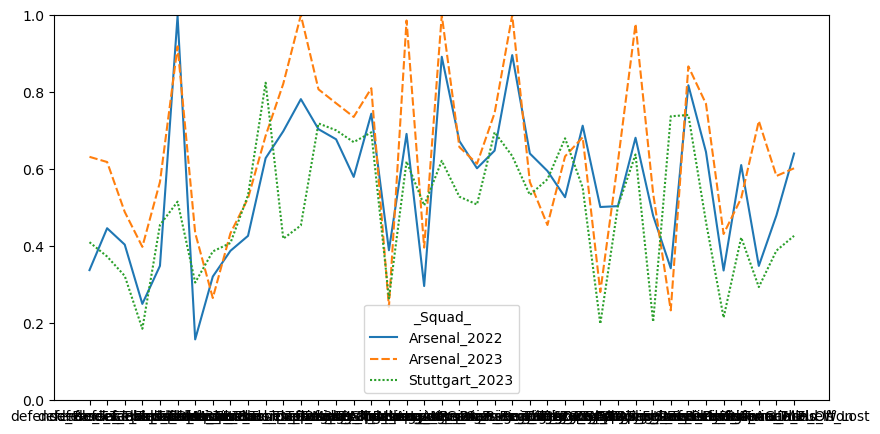

In [135]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
sns.lineplot(data=team_data_scaled.loc[['Arsenal_2022', 'Arsenal_2023', 'Stuttgart_2023']].T, ax=ax)

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [128]:
team_data_pca = pd.DataFrame(index=team_data_scaled.index)
pca_types_dict = {}
explained_variance_total = 0

for column_group in stat_types_dict.keys():
        current_columns = stat_types_dict[column_group]
        pca_result = pca.fit_transform(team_data_scaled[current_columns])
        pca_names = f'{column_group}_' + pca.get_feature_names_out()
        pca_types_dict[column_group] = pca_names.tolist()
        team_data_pca[pca_names] = pca_result
        explained_variance_total += pca.explained_variance_ratio_

explained_variance_total /= len(pca_types_dict)
explained_variance_total[0]

0.6634645255121862

In [149]:
team_data_pca_scaled = MinMaxScaler().fit_transform(team_data_pca)
team_data_pca_scaled = pd.DataFrame(team_data_pca_scaled, index=team_data_pca.index, columns=team_data_pca.columns)

In [163]:
team_data_pca_scaled.index[:50]

Index(['Ajaccio_2022', 'Almería_2022', 'Angers_2022', 'Arsenal_2022',
       'Aston Villa_2022', 'Atalanta_2022', 'Athletic Club_2022',
       'Atlético Madrid_2022', 'Augsburg_2022', 'Auxerre_2022',
       'Barcelona_2022', 'Bayern Munich_2022', 'Betis_2022', 'Bochum_2022',
       'Bologna_2022', 'Bournemouth_2022', 'Brentford_2022', 'Brest_2022',
       'Brighton_2022', 'Celta Vigo_2022', 'Chelsea_2022',
       'Clermont Foot_2022', 'Cremonese_2022', 'Crystal Palace_2022',
       'Cádiz_2022', 'Dortmund_2022', 'Eint Frankfurt_2022', 'Elche_2022',
       'Empoli_2022', 'Espanyol_2022', 'Everton_2022', 'Fiorentina_2022',
       'Freiburg_2022', 'Fulham_2022', 'Getafe_2022', 'Girona_2022',
       'Gladbach_2022', 'Hellas Verona_2022', 'Hertha BSC_2022',
       'Hoffenheim_2022', 'Inter_2022', 'Juventus_2022', 'Köln_2022',
       'Lazio_2022', 'Lecce_2022', 'Leeds United_2022', 'Leicester City_2022',
       'Lens_2022', 'Leverkusen_2022', 'Lille_2022'],
      dtype='object', name='_Squad

<Axes: >

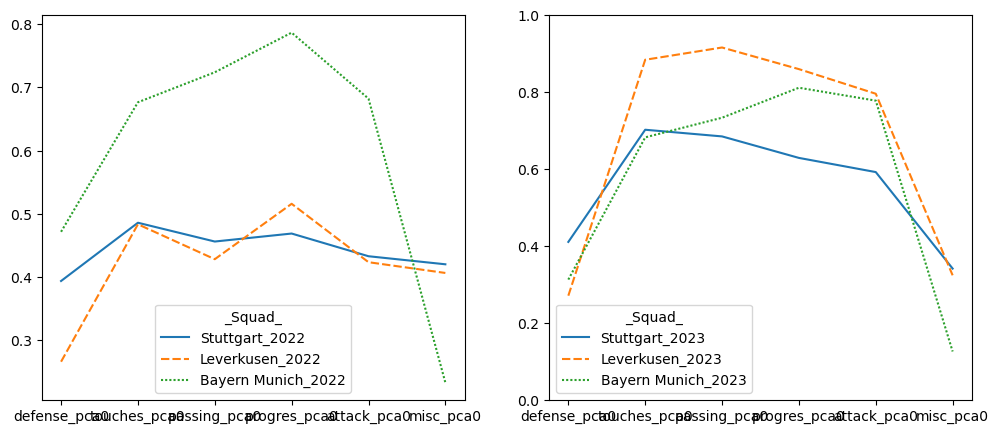

In [171]:
team1 = 'Stuttgart'
team2 = 'Leverkusen'
team3 = 'Bayern Munich'

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
plt.ylim(0, 1)
sns.lineplot(data=team_data_pca_scaled.loc[[f'{team1}_2022', f'{team2}_2022', f'{team3}_2022']].T, ax=axs[0])
sns.lineplot(data=team_data_pca_scaled.loc[[f'{team1}_2023', f'{team2}_2023', f'{team3}_2023']].T, ax=axs[1])

In [ ]:
def plot_team_radar(data: dict, color='#FF5733') -> None:

    # Each attribute we'll plot in the radar chart.
    labels = list(data.keys())
    values = list(data.values())
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop and append the start value to the end.
    values += values[:1]
    labels += labels[:1]
    angles += angles[:1]

    # Create the figure and polar subplot
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # Draw the outline of our data
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    # Fill it in
    ax.fill(angles, values, color=color, alpha=0.4)

    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label
    ax.set_thetagrids(np.degrees(angles), labels, fontsize=12, color='#4B0082')

    # Adjust alignment of labels
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # Ensure radar goes from 0 to 20
    ax.set_ylim(0, 1)
    ax.set_rgrids([0.25, 0.50, 0.75, 1.00], color='#AAAAAA', alpha=0.5)

    # Set position of y-labels
    ax.set_rlabel_position(180 / num_vars)

    # Customize appearance
    ax.tick_params(colors='#4B0082')
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(color='#DDDDDD', linestyle='--')
    ax.spines['polar'].set_color('#4B0082')
    ax.set_facecolor('#FAFAFA')

    # Set title with a stylish font
    # ax.set_title(data['name'], y=1.1, fontsize=20, color='#4B0082', fontweight='bold')
    plt.show()

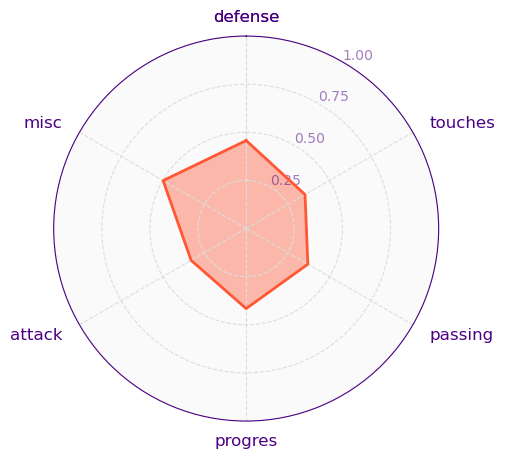

In [253]:
team = 'Valencia'
season = 2022

plot_data = team_data_pca_scaled.loc[f'{team}_{season}']
plot_data.index = [idx[0] for idx in plot_data.index.str.split('_')]

plot_team_radar(plot_data.to_dict())

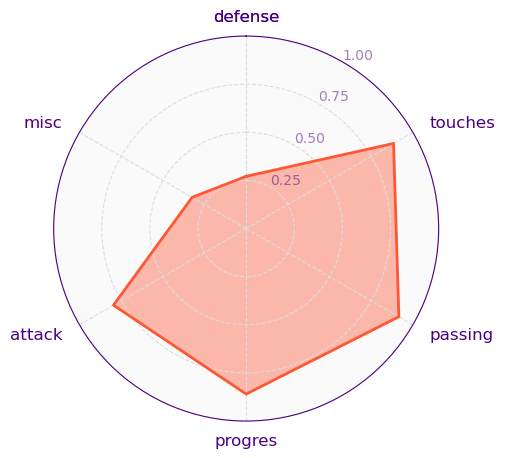